In [1]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 14.5 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=757bb5a2abc3eeb9160de1649098797bc8d34731acb92554c6a209ee0fe452a7
  Stored in directory: /Users/karthikravi/Library/Caches/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [7]:
import json
 
# Opening JSON file
f = open('LLM_output_just_pluse_rev_news_first_100_training.json')
 
# returns JSON object as 
# a dictionary
just_pluse_rev_tweet = json.load(f)

# Opening JSON file
f = open('LLM_output_just_news_first_100_training.json')
 
# returns JSON object as 
# a dictionary
just_BM25_tweet = json.load(f)


f = open('train_outputs.json')
 
# returns JSON object as 
# a dictionary
tweet_output_train = json.load(f)

In [6]:
!wget https://ciir.cs.umass.edu/downloads/LaMP/LaMP_4/train/train_outputs.json

--2023-12-11 12:21:24--  https://ciir.cs.umass.edu/downloads/LaMP/LaMP_4/train/train_outputs.json
Resolving ciir.cs.umass.edu (ciir.cs.umass.edu)... 128.119.246.154
Connecting to ciir.cs.umass.edu (ciir.cs.umass.edu)|128.119.246.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1150558 (1.1M) [application/json]
Saving to: ‘train_outputs.json’

train_outputs.json  100%[===================>]   1.10M  3.08MB/s    in 0.4s    

2023-12-11 12:21:25 (3.08 MB/s) - ‘train_outputs.json’ saved [1150558/1150558]



In [8]:

def remove_initial_tokens(list_of_LLM_op):
    clean_output = []
    for i in list_of_LLM_op:
        clean_output.append(i.replace("<pad>", "", 1).replace("</s>", "",1))
    return clean_output

just_pluse_rev_tweet_clean = remove_initial_tokens(just_pluse_rev_tweet['LLM_output'])
just_BM25_tweet_clean = remove_initial_tokens(just_BM25_tweet['LLM_output'])

In [19]:
tweet_output_train_list = [i['output'] for i in tweet_output_train["golds"]]
R1_f1_score_bm25 = []
RL_f1_score_bm25 = []
R1_f1_score_tl = []
RL_f1_score_tl = []
R1_prec_score_tl = []
RL_prec_score_tl = []
RL_recall_score_tl = []
R1_recall_score_tl = []
RL_prec_score_bm25 = []
R1_prec_score_bm25 = []
RL_recall_score_bm25 = []
R1_recall_score_bm25 = []

for i in range(100):
    scores = scorer.score(tweet_output_train_list[i],
                      just_pluse_rev_tweet_clean[i])
    R1_f1_score_tl.append(scores['rouge1'].fmeasure)
    RL_f1_score_tl.append(scores['rougeL'].fmeasure)
    RL_prec_score_tl.append(scores['rougeL'].precision)
    R1_prec_score_tl.append(scores['rouge1'].precision)
    RL_recall_score_tl.append(scores['rougeL'].recall)
    R1_recall_score_tl.append(scores['rouge1'].recall)

    scores = scorer.score(tweet_output_train_list[i],
                      just_BM25_tweet_clean[i])
    R1_f1_score_bm25.append(scores['rouge1'].fmeasure)
    RL_f1_score_bm25.append(scores['rougeL'].fmeasure)
    RL_prec_score_bm25.append(scores['rougeL'].precision)
    R1_prec_score_bm25.append(scores['rouge1'].precision)
    RL_recall_score_bm25.append(scores['rougeL'].recall)
    R1_recall_score_bm25.append(scores['rouge1'].recall)
all_values = {"R1_f1_score_bm25":R1_f1_score_bm25,
                "RL_f1_score_bm25":RL_f1_score_bm25,
                "R1_f1_score_tl":R1_f1_score_tl,
                "RL_f1_score_tl":RL_f1_score_tl,
                "R1_prec_score_tl":R1_prec_score_tl,
                "RL_prec_score_tl":RL_prec_score_tl,
                "RL_recall_score_tl":RL_recall_score_tl,
                "R1_recall_score_tl":R1_recall_score_tl,
                "RL_prec_score_bm25":RL_prec_score_bm25,
                "R1_prec_score_bm25":R1_prec_score_bm25,
                "RL_recall_score_bm25":RL_recall_score_bm25,
                "R1_recall_score_bm25":R1_recall_score_bm25}
for i in all_values:
    print(f"{i},{np.mean(all_values[i])}")

R1_f1_score_bm25,0.12410357956475489
RL_f1_score_bm25,0.11163753862030318
R1_f1_score_tl,0.12859554664468656
RL_f1_score_tl,0.11921335663191185
R1_prec_score_tl,0.10478629050687874
RL_prec_score_tl,0.09631176095146683
RL_recall_score_tl,0.17396768917357153
R1_recall_score_tl,0.18570914216502454
RL_prec_score_bm25,0.08917048556019143
R1_prec_score_bm25,0.10071507006065827
RL_recall_score_bm25,0.16550737171325408
R1_recall_score_bm25,0.18078850724438958


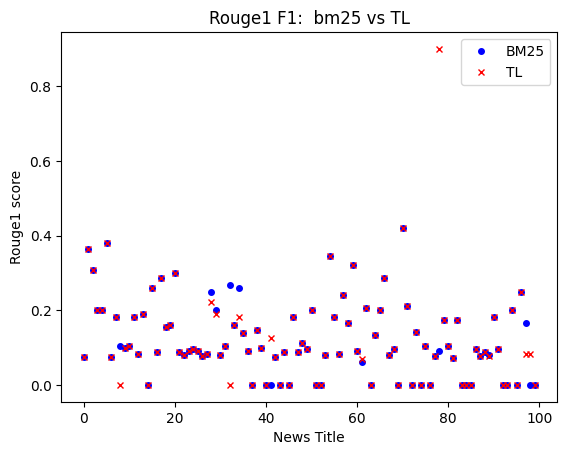

In [41]:
import matplotlib.pyplot as plt


# Plotting
plt.plot(R1_f1_score_bm25, 'bo', ms=4, label = 'BM25')  # 'bo' for blue dots, ms is marker size
plt.plot(R1_f1_score_tl, 'rx', ms=4, label = 'TL') 

plt.legend()
# Adding labels and title
plt.xlabel('News Title')
plt.ylabel('Rouge1 score')
plt.title('Rouge1 F1:  bm25 vs TL')

# Display the plot
plt.show()



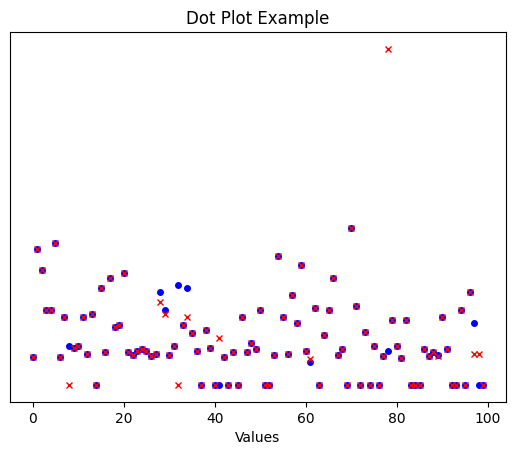

In [31]:
import matplotlib.pyplot as plt

plt.plot(list1, 'bo', ms=4)  # 'bo' for blue dots, ms is marker size
plt.plot(list2, 'rx', ms=4) 

# Adding labels and title
plt.xlabel('Values')
plt.title('Dot Plot Example')

# Hiding y-axis
plt.yticks([])

# Display the plot
plt.show()

In [22]:
!pip install matplotlib

  Using cached contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 1.2 MB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.1-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 2.0 MB/s eta 0:00:0000:0100:010m
Using cached contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl (243 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 2.8 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.5-cp311-cp311-macosx_11_0_arm64.whl (66 kB)
Using cached pyparsing-3.1.1-py3-none-any.whl (103 kB)
